<a href="https://colab.research.google.com/github/stacykeago/CORE-MODULE-2.-WEEK-1/blob/main/INDEPENDENT_PROJECT_2_5_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach
What to train given:
Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

Hint:

Home Team

Home Team Score

Away Team

Away Team Score

Year

Home Team Rank

Away Team Rank

Tournament Type

Status
(W,L,D)
Morocco
2
Kenya
1
2003
20
58
World Cup
Win
 

Context
A more detailed explanation and history of the rankings is available here: [Link (Links to an external site.)] 

An explanation of the ranking procedure is available here: [Link (Links to an external site.)]

Dataset Columns

Some features are available on the FIFA ranking page [Link (Links to an external site.)].

Rank
Country Abbreviation
Total Points
Previous Points
Rank Change
Average Previous Years Points
Average Previous Years Points Weighted (50%)
Average 2 Years Ago Points
Average 2 Years Ago Points Weighted (30%)
Average 3 Years Ago Points
Average 3 Years Ago Points Weighted (20%)
Confederation
Date - date of the match
Home_team - the name of the home team
Away_team - the name of the away team
Home_score - full-time home team score including extra time, not including penalty-shootouts
Away_score - full-time away team score including extra time, not including penalty-shootouts
Tournament - the name of the tournament
City - the name of the city/town/administrative unit where the match was played
Country - the name of the country where the match was played
Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue
Assessment Expectation

In order to work on the above problem, you need to do the following:

Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
Expected flow for the assessment:
Perform your EDA
Perform any necessary feature engineering 
Check of multicollinearity
Start building the model
Cross-validate the model
Compute RMSE
Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
Perform appropriate regressions on the data including your justification
Challenge your solution by providing insights on how you can make improvements.
Dataset

The dataset and glossary to use for this project can be found here. [Link (Links to an external site.)] 

Submission & Evaluation

The submission to this week's Independent Project should be made here [Link]. This submission will be a link to your GitHub repository.  

Note:

The deadline for this assessment is 6.00 pm on the day of the assessment.
Late submissions will not be assessed. 
Do not seek to copy someone else’s work while working on this Independent project. You deny yourself an opportunity to learn whenever you resolve to plagiarism. 

# Exploratory Data Analysis

## Import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split


## Load Dataset

In [3]:
# we have two datasets fifa and reuslts dataset
# The dataset https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc
# https://drive.google.com/file/d/1VGvPwkM75Uz34ANKV1oCjwCQMWf_vOc-/view?usp=sharing

fifa = pd.read_csv('/content/fifa_ranking.csv')
results = pd.read_csv('/content/results.csv')

## Preview dataset

In [4]:
# preview both data sets
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
# preview the results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## Data Cleaning

1. Check for Null values.
2. Replace Null values
3. Drop Null values
4. Check for duplicates
5. Check for outliers
6. Check for anomalies

## Check for and drop null values

In [6]:
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
# No null values in the results dataset

In [37]:
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [ ]:
# No null values in the fifa dataset

## Check for shape

In [7]:
# check for rows and columns in the results data
results.shape

(40839, 9)

In [8]:
# check for rows and columns in the fifa data
fifa.shape

(52404, 16)

## Drop duplicates

In [9]:
#Checking for duplicates:
fifa.duplicated().sum()


37

In [10]:
#The data has 37 Duplicates. 
# Dropping them:
fifa.drop_duplicates(inplace=True)
fifa.duplicated().sum()

0

In [42]:
# check for duplicates in results dataset
results.duplicated().sum()

0

In [ ]:
# there no duplicates in results dataset

## Unique values

In [11]:
# check for unique values
fifa.nunique()

rank                        209
country_full                214
country_abrv                214
total_points               8058
previous_points            1514
rank_change                 118
cur_year_avg               5599
cur_year_avg_weighted      5599
last_year_avg              5482
last_year_avg_weighted     5254
two_year_ago_avg           5512
two_year_ago_weighted      4972
three_year_ago_avg         5567
three_year_ago_weighted    4550
confederation                 6
rank_date                   261
dtype: int64

In [25]:
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

## Drop columns

In [12]:
# Drop some columns
#fifa.drop(['country_abrv', 'rank_date', 'date', 'city'], axis=1, inplace=True) 
#.head()
fifa.drop(columns=['country_abrv', 'rank_date']) 
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [13]:
results.drop(columns=['date', 'city'])
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## Check and align column datatypes

In [14]:
fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points            float64
rank_change                float64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [15]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## Outliers


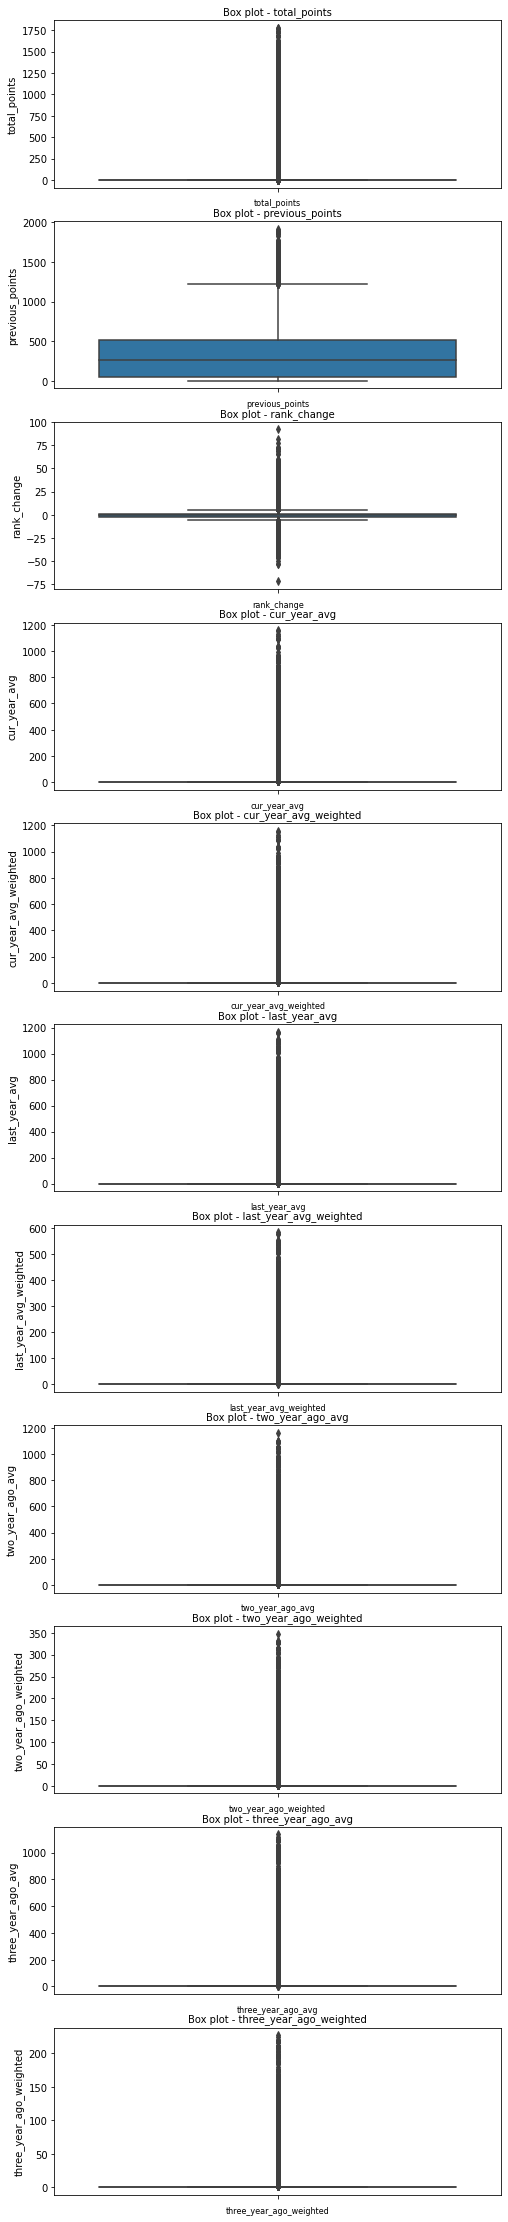

In [16]:
col_names =['total_points', 'previous_points', 'rank_change', 'cur_year_avg','cur_year_avg_weighted', 
            'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
            'three_year_ago_avg','three_year_ago_weighted']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=fifa[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [ ]:
# There are outliers in total points and previous points in the fifa dataset 

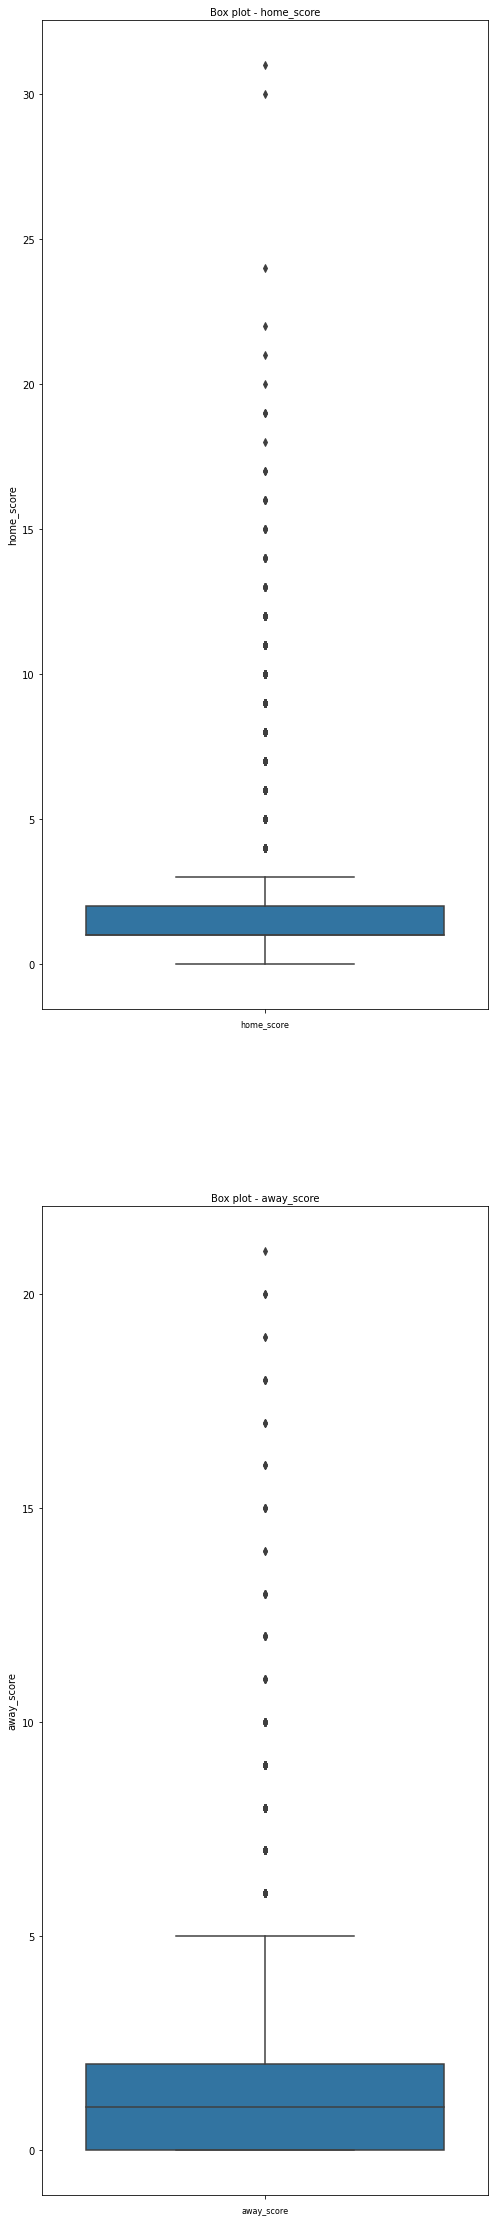

In [62]:
col_names =['home_score', 'away_score']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=results[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [ ]:
# there are outliers in away score and in home score

## Null values

In [17]:
#check for null values in NEW
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            1
rank_change                1
cur_year_avg               1
cur_year_avg_weighted      1
last_year_avg              1
last_year_avg_weighted     1
two_year_ago_avg           1
two_year_ago_weighted      1
three_year_ago_avg         1
three_year_ago_weighted    1
confederation              1
rank_date                  1
dtype: int64

In [ ]:
# No null values in fifa dataset

In [18]:
#check for null values in NEW
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
# No null values in results dataset

# Polynomial Regression

In [77]:
#Get the columns from the dataset 
X = results.home_score
y = results.away_score
print(X)
print(y)

0        0
1        4
2        2
3        2
4        3
        ..
40834    8
40835    4
40836    0
40837    0
40838    1
Name: home_score, Length: 40839, dtype: int64
0        0
1        2
2        1
3        2
4        0
        ..
40834    1
40835    4
40836    1
40837    1
40838    1
Name: away_score, Length: 40839, dtype: int64


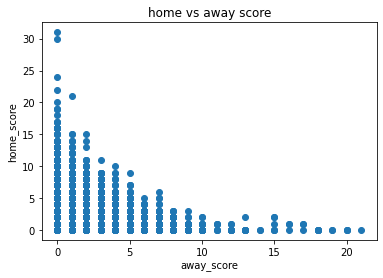

In [23]:
# Since our dataset is pretty clean, let's start by visualizing our dataset by plotting a scatter plot

import matplotlib.pyplot as plt
# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

y= results.home_score 
X =results.away_score
plt.scatter(X,y)
plt.title('home vs away score')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()

In [24]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
# Fit Linear Regression model to the dataset.
# We are doing this for the sole purpose of comparing 
# the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)


NotFittedError: ignored

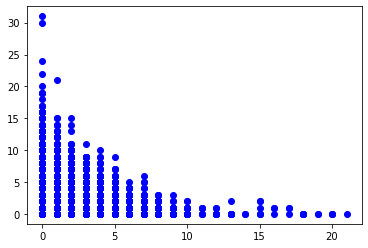

In [29]:
# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('results prediction(Linear Regression)')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()

In [ ]:
y_pred = results.predict(np.array([int(a1),int(b1),int(c1),int(d1)]).reshape(1, -1))

In [36]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
y_pred = results.predict(np.array([int(a1),int(b1),int(c1),int(d1)]).reshape(1, -1))
X_poly = poly_reg.fit_transform(X)


AttributeError: ignored

In [32]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

NameError: ignored

# Logistic Regression

# Cross validate

In [38]:

# We will use 5 independent variables for this
X = fifa[['rank_change','cur_year_avg',	'last_year_avg', 'two_year_ago_avg',	'three_year_ago_avg']].values
y = fifa['total_points'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [42]:
# find optimal coefficients and intercept
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

ValueError: ignored